In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

# 1. 기존의 프로그램 방식
- 회귀분석(linear regression) 설명 사이트 : https://gbhat.com/machine_learning/linear_regression.html
- 오차함수 : MSE(오차제곱평균), RMSE(루트를 취하기 때문에 MSE의 단점이 어느정도 해소. 이상치에 덜 민감), MAE(mean absolute erroerror ; 절대값평균)
- https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-mae-rmse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62
![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*XRXgMqrr5rq-V1rW7SkrtA.png)
- 경사하강법 설명
- https://www.mql5.com/ko/articles/11200

In [2]:
# 섭씨온도를 입력받아 화씨온도를 출력
def celsius_to_faherenheit(c) :
    return c * 1.8 + 32

In [3]:
input_c = int(input('섭씨온도 ? '))
print('화씨온도는 ', celsius_to_faherenheit(input_c))

섭씨온도 ? 1
화씨온도는  33.8


# 2. 머신러닝 프로그램 방식
```
1. 데이터 확보 및 생성
2. 데이터 전처리 : 
    스케일 조정
    훈련데이터(학습데이터셋), 검증데이터셋, 시험데이터셋으로 분할
3. 모델구성
4. 모델 학습과정 설정
5. 모델 학습
6. 모델 평가(시험데이터셋으로)
7. 모델 사용(입력값 주어지면 예측값 받기)
```
## 2.1 노이즈가 없는 데이터로 실습

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 1. 데이터 생성
data_C = np.arange(100) # 0부터 99까지(100개)
data_C # 독립변수(입력변수)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [8]:
data_F = celsius_to_faherenheit(data_C)
data_F # 종속변수(타겟변수, 출력변수)

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [10]:
# 2. 데이터 전처리 : 컴퓨터에게 학습시키기 위해 스케일 조정
scaled_data_C = data_C / 100.0
scaled_data_F = data_F / 100.0
print('학습 시 독립변수 : ', scaled_data_C)
print('학습 시 타겟변수 : ', scaled_data_F)

학습 시 독립변수 :  [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
학습 시 타겟변수 :  [0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.6

In [11]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.10.0


[]

In [13]:
# 3. 모델 구성
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input # 입력값과 출력값으로 layer층 지정

model = Sequential()
# model.add(Input(shape(1, ) ))
# model.add(Dense(1))
model.add(Dense(units=1, # 입력(독립) 변수의 shape
               input_shape=(1,))) # 타겟(종속) 변수의 갯수

In [15]:
# 4. 모델 학습과정 설정
model.compile(loss="mse", # 손실함수 : 모델 학습 중 오차를 최소화하기 위해 사용
             optimizer="rmsprop", # 옵티마이저
             metrics=['mae']) # 평가지표
# mse : 오차 제곱의 평균(이상치 반영)
# mae : 오차 절대값의 평균(이상치 영향이 감소)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [16]:
# 학습전 예측
model.predict(np.array([[0],
                       [0.01]])) # 섭씨온도 0, 1도는 화씨온도 몇도?

1/1 [==============================] - 0s 86ms/step


array([[0.       ],
       [0.0026198]], dtype=float32)

In [18]:
# 학습전 모델 저장
model.save('model/before_learning.h5')

In [19]:
# 5. 모델 학습시키기 - 1회만 실행
hist = model.fit(scaled_data_C, # 입력변수(훈련데이터)
                scaled_data_F, # 타겟변수(훈련데이터)
                epochs=1000, # 학습횟수
                verbose=2) # 학습시 출력여부(0 : 학습내용출력 X)

Epoch 1/1000
4/4 - 0s - loss: 1.3558 - mae: 1.0767 - 328ms/epoch - 82ms/step
Epoch 2/1000
4/4 - 0s - loss: 1.3300 - mae: 1.0656 - 8ms/epoch - 2ms/step
Epoch 3/1000
4/4 - 0s - loss: 1.3116 - mae: 1.0576 - 8ms/epoch - 2ms/step
Epoch 4/1000
4/4 - 0s - loss: 1.2947 - mae: 1.0501 - 7ms/epoch - 2ms/step
Epoch 5/1000
4/4 - 0s - loss: 1.2796 - mae: 1.0436 - 8ms/epoch - 2ms/step
Epoch 6/1000
4/4 - 0s - loss: 1.2644 - mae: 1.0367 - 8ms/epoch - 2ms/step
Epoch 7/1000
4/4 - 0s - loss: 1.2518 - mae: 1.0311 - 7ms/epoch - 2ms/step
Epoch 8/1000
4/4 - 0s - loss: 1.2386 - mae: 1.0251 - 20ms/epoch - 5ms/step
Epoch 9/1000
4/4 - 0s - loss: 1.2258 - mae: 1.0194 - 9ms/epoch - 2ms/step
Epoch 10/1000
4/4 - 0s - loss: 1.2126 - mae: 1.0134 - 7ms/epoch - 2ms/step
Epoch 11/1000
4/4 - 0s - loss: 1.1996 - mae: 1.0074 - 7ms/epoch - 2ms/step
Epoch 12/1000
4/4 - 0s - loss: 1.1868 - mae: 1.0015 - 7ms/epoch - 2ms/step
Epoch 13/1000
4/4 - 0s - loss: 1.1742 - mae: 0.9958 - 8ms/epoch - 2ms/step
Epoch 14/1000
4/4 - 0s - loss:

4/4 - 0s - loss: 0.2937 - mae: 0.4494 - 8ms/epoch - 2ms/step
Epoch 111/1000
4/4 - 0s - loss: 0.2882 - mae: 0.4448 - 6ms/epoch - 1ms/step
Epoch 112/1000
4/4 - 0s - loss: 0.2829 - mae: 0.4402 - 8ms/epoch - 2ms/step
Epoch 113/1000
4/4 - 0s - loss: 0.2769 - mae: 0.4351 - 7ms/epoch - 2ms/step
Epoch 114/1000
4/4 - 0s - loss: 0.2714 - mae: 0.4302 - 6ms/epoch - 1ms/step
Epoch 115/1000
4/4 - 0s - loss: 0.2662 - mae: 0.4256 - 7ms/epoch - 2ms/step
Epoch 116/1000
4/4 - 0s - loss: 0.2613 - mae: 0.4215 - 5ms/epoch - 1ms/step
Epoch 117/1000
4/4 - 0s - loss: 0.2556 - mae: 0.4164 - 6ms/epoch - 1ms/step
Epoch 118/1000
4/4 - 0s - loss: 0.2504 - mae: 0.4116 - 5ms/epoch - 1ms/step
Epoch 119/1000
4/4 - 0s - loss: 0.2448 - mae: 0.4068 - 6ms/epoch - 2ms/step
Epoch 120/1000
4/4 - 0s - loss: 0.2399 - mae: 0.4023 - 5ms/epoch - 1ms/step
Epoch 121/1000
4/4 - 0s - loss: 0.2351 - mae: 0.3981 - 6ms/epoch - 1ms/step
Epoch 122/1000
4/4 - 0s - loss: 0.2308 - mae: 0.3942 - 5ms/epoch - 1ms/step
Epoch 123/1000
4/4 - 0s - l

Epoch 218/1000
4/4 - 0s - loss: 0.0444 - mae: 0.1822 - 9ms/epoch - 2ms/step
Epoch 219/1000
4/4 - 0s - loss: 0.0440 - mae: 0.1814 - 8ms/epoch - 2ms/step
Epoch 220/1000
4/4 - 0s - loss: 0.0436 - mae: 0.1805 - 7ms/epoch - 2ms/step
Epoch 221/1000
4/4 - 0s - loss: 0.0431 - mae: 0.1795 - 9ms/epoch - 2ms/step
Epoch 222/1000
4/4 - 0s - loss: 0.0427 - mae: 0.1787 - 9ms/epoch - 2ms/step
Epoch 223/1000
4/4 - 0s - loss: 0.0423 - mae: 0.1779 - 12ms/epoch - 3ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.0419 - mae: 0.1770 - 7ms/epoch - 2ms/step
Epoch 225/1000
4/4 - 0s - loss: 0.0414 - mae: 0.1759 - 8ms/epoch - 2ms/step
Epoch 226/1000
4/4 - 0s - loss: 0.0410 - mae: 0.1751 - 8ms/epoch - 2ms/step
Epoch 227/1000
4/4 - 0s - loss: 0.0406 - mae: 0.1741 - 9ms/epoch - 2ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.0402 - mae: 0.1735 - 8ms/epoch - 2ms/step
Epoch 229/1000
4/4 - 0s - loss: 0.0399 - mae: 0.1727 - 10ms/epoch - 2ms/step
Epoch 230/1000
4/4 - 0s - loss: 0.0395 - mae: 0.1718 - 9ms/epoch - 2ms/step
Epoch 231/

Epoch 326/1000
4/4 - 0s - loss: 0.0116 - mae: 0.0930 - 7ms/epoch - 2ms/step
Epoch 327/1000
4/4 - 0s - loss: 0.0113 - mae: 0.0921 - 10ms/epoch - 2ms/step
Epoch 328/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0910 - 6ms/epoch - 1ms/step
Epoch 329/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0903 - 6ms/epoch - 1ms/step
Epoch 330/1000
4/4 - 0s - loss: 0.0108 - mae: 0.0895 - 7ms/epoch - 2ms/step
Epoch 331/1000
4/4 - 0s - loss: 0.0106 - mae: 0.0888 - 7ms/epoch - 2ms/step
Epoch 332/1000
4/4 - 0s - loss: 0.0104 - mae: 0.0882 - 8ms/epoch - 2ms/step
Epoch 333/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0875 - 8ms/epoch - 2ms/step
Epoch 334/1000
4/4 - 0s - loss: 0.0101 - mae: 0.0866 - 8ms/epoch - 2ms/step
Epoch 335/1000
4/4 - 0s - loss: 0.0099 - mae: 0.0859 - 8ms/epoch - 2ms/step
Epoch 336/1000
4/4 - 0s - loss: 0.0097 - mae: 0.0850 - 8ms/epoch - 2ms/step
Epoch 337/1000
4/4 - 0s - loss: 0.0095 - mae: 0.0842 - 6ms/epoch - 2ms/step
Epoch 338/1000
4/4 - 0s - loss: 0.0093 - mae: 0.0834 - 7ms/epoch - 2ms/step
Epoch 339/1

Epoch 433/1000
4/4 - 0s - loss: 9.7940e-05 - mae: 0.0086 - 7ms/epoch - 2ms/step
Epoch 434/1000
4/4 - 0s - loss: 8.4581e-05 - mae: 0.0080 - 8ms/epoch - 2ms/step
Epoch 435/1000
4/4 - 0s - loss: 7.2818e-05 - mae: 0.0073 - 6ms/epoch - 2ms/step
Epoch 436/1000
4/4 - 0s - loss: 6.3135e-05 - mae: 0.0068 - 6ms/epoch - 1ms/step
Epoch 437/1000
4/4 - 0s - loss: 5.0295e-05 - mae: 0.0062 - 9ms/epoch - 2ms/step
Epoch 438/1000
4/4 - 0s - loss: 4.1470e-05 - mae: 0.0055 - 7ms/epoch - 2ms/step
Epoch 439/1000
4/4 - 0s - loss: 3.2027e-05 - mae: 0.0049 - 6ms/epoch - 1ms/step
Epoch 440/1000
4/4 - 0s - loss: 2.6540e-05 - mae: 0.0044 - 9ms/epoch - 2ms/step
Epoch 441/1000
4/4 - 0s - loss: 2.0054e-05 - mae: 0.0038 - 7ms/epoch - 2ms/step
Epoch 442/1000
4/4 - 0s - loss: 1.4866e-05 - mae: 0.0033 - 9ms/epoch - 2ms/step
Epoch 443/1000
4/4 - 0s - loss: 1.1159e-05 - mae: 0.0029 - 7ms/epoch - 2ms/step
Epoch 444/1000
4/4 - 0s - loss: 7.4143e-06 - mae: 0.0023 - 9ms/epoch - 2ms/step
Epoch 445/1000
4/4 - 0s - loss: 4.8145e-

Epoch 532/1000
4/4 - 0s - loss: 4.6669e-07 - mae: 6.6921e-04 - 7ms/epoch - 2ms/step
Epoch 533/1000
4/4 - 0s - loss: 5.1342e-07 - mae: 6.9589e-04 - 7ms/epoch - 2ms/step
Epoch 534/1000
4/4 - 0s - loss: 7.1704e-07 - mae: 8.1935e-04 - 6ms/epoch - 2ms/step
Epoch 535/1000
4/4 - 0s - loss: 5.9090e-07 - mae: 7.4715e-04 - 6ms/epoch - 1ms/step
Epoch 536/1000
4/4 - 0s - loss: 4.1674e-07 - mae: 6.2970e-04 - 7ms/epoch - 2ms/step
Epoch 537/1000
4/4 - 0s - loss: 9.8654e-07 - mae: 9.5886e-04 - 6ms/epoch - 1ms/step
Epoch 538/1000
4/4 - 0s - loss: 4.0803e-07 - mae: 6.2112e-04 - 7ms/epoch - 2ms/step
Epoch 539/1000
4/4 - 0s - loss: 3.3023e-07 - mae: 5.5794e-04 - 6ms/epoch - 1ms/step
Epoch 540/1000
4/4 - 0s - loss: 5.9617e-07 - mae: 7.5457e-04 - 6ms/epoch - 1ms/step
Epoch 541/1000
4/4 - 0s - loss: 4.9648e-07 - mae: 6.8721e-04 - 6ms/epoch - 1ms/step
Epoch 542/1000
4/4 - 0s - loss: 5.3202e-07 - mae: 7.1193e-04 - 5ms/epoch - 1ms/step
Epoch 543/1000
4/4 - 0s - loss: 7.6507e-07 - mae: 8.5313e-04 - 13ms/epoch - 

4/4 - 0s - loss: 6.1166e-07 - mae: 7.3350e-04 - 5ms/epoch - 1ms/step
Epoch 631/1000
4/4 - 0s - loss: 1.3309e-07 - mae: 3.5174e-04 - 7ms/epoch - 2ms/step
Epoch 632/1000
4/4 - 0s - loss: 6.7244e-07 - mae: 7.9046e-04 - 6ms/epoch - 1ms/step
Epoch 633/1000
4/4 - 0s - loss: 7.5670e-07 - mae: 8.4545e-04 - 6ms/epoch - 1ms/step
Epoch 634/1000
4/4 - 0s - loss: 8.5992e-07 - mae: 8.8358e-04 - 6ms/epoch - 1ms/step
Epoch 635/1000
4/4 - 0s - loss: 2.5441e-07 - mae: 4.9317e-04 - 6ms/epoch - 2ms/step
Epoch 636/1000
4/4 - 0s - loss: 2.5351e-07 - mae: 4.8521e-04 - 7ms/epoch - 2ms/step
Epoch 637/1000
4/4 - 0s - loss: 1.2722e-06 - mae: 0.0011 - 6ms/epoch - 1ms/step
Epoch 638/1000
4/4 - 0s - loss: 2.9164e-07 - mae: 5.2573e-04 - 6ms/epoch - 2ms/step
Epoch 639/1000
4/4 - 0s - loss: 4.5347e-07 - mae: 6.5837e-04 - 5ms/epoch - 1ms/step
Epoch 640/1000
4/4 - 0s - loss: 1.1904e-06 - mae: 0.0010 - 9ms/epoch - 2ms/step
Epoch 641/1000
4/4 - 0s - loss: 1.3670e-07 - mae: 3.4928e-04 - 6ms/epoch - 2ms/step
Epoch 642/1000


Epoch 729/1000
4/4 - 0s - loss: 8.7752e-07 - mae: 9.1961e-04 - 7ms/epoch - 2ms/step
Epoch 730/1000
4/4 - 0s - loss: 7.3868e-07 - mae: 8.3093e-04 - 6ms/epoch - 1ms/step
Epoch 731/1000
4/4 - 0s - loss: 1.4599e-07 - mae: 3.7662e-04 - 6ms/epoch - 1ms/step
Epoch 732/1000
4/4 - 0s - loss: 4.9265e-07 - mae: 6.7858e-04 - 7ms/epoch - 2ms/step
Epoch 733/1000
4/4 - 0s - loss: 1.2579e-06 - mae: 0.0011 - 6ms/epoch - 2ms/step
Epoch 734/1000
4/4 - 0s - loss: 2.9610e-07 - mae: 5.2595e-04 - 6ms/epoch - 2ms/step
Epoch 735/1000
4/4 - 0s - loss: 1.4616e-07 - mae: 3.7025e-04 - 7ms/epoch - 2ms/step
Epoch 736/1000
4/4 - 0s - loss: 4.5941e-07 - mae: 6.3441e-04 - 6ms/epoch - 1ms/step
Epoch 737/1000
4/4 - 0s - loss: 1.4123e-06 - mae: 0.0011 - 5ms/epoch - 1ms/step
Epoch 738/1000
4/4 - 0s - loss: 2.8252e-07 - mae: 5.1983e-04 - 6ms/epoch - 1ms/step
Epoch 739/1000
4/4 - 0s - loss: 1.0054e-07 - mae: 3.0831e-04 - 6ms/epoch - 2ms/step
Epoch 740/1000
4/4 - 0s - loss: 2.1953e-07 - mae: 4.3040e-04 - 8ms/epoch - 2ms/step


4/4 - 0s - loss: 1.1956e-06 - mae: 0.0011 - 7ms/epoch - 2ms/step
Epoch 828/1000
4/4 - 0s - loss: 2.0185e-07 - mae: 4.3993e-04 - 8ms/epoch - 2ms/step
Epoch 829/1000
4/4 - 0s - loss: 6.1516e-07 - mae: 7.6979e-04 - 16ms/epoch - 4ms/step
Epoch 830/1000
4/4 - 0s - loss: 9.4612e-07 - mae: 9.5067e-04 - 10ms/epoch - 3ms/step
Epoch 831/1000
4/4 - 0s - loss: 2.3612e-07 - mae: 4.7669e-04 - 8ms/epoch - 2ms/step
Epoch 832/1000
4/4 - 0s - loss: 4.1905e-07 - mae: 6.2999e-04 - 9ms/epoch - 2ms/step
Epoch 833/1000
4/4 - 0s - loss: 1.0465e-06 - mae: 1.0000e-03 - 8ms/epoch - 2ms/step
Epoch 834/1000
4/4 - 0s - loss: 8.2677e-07 - mae: 8.6654e-04 - 7ms/epoch - 2ms/step
Epoch 835/1000
4/4 - 0s - loss: 1.1009e-07 - mae: 3.1986e-04 - 9ms/epoch - 2ms/step
Epoch 836/1000
4/4 - 0s - loss: 4.0706e-07 - mae: 6.1129e-04 - 8ms/epoch - 2ms/step
Epoch 837/1000
4/4 - 0s - loss: 1.1845e-06 - mae: 0.0011 - 8ms/epoch - 2ms/step
Epoch 838/1000
4/4 - 0s - loss: 5.1947e-07 - mae: 6.9811e-04 - 7ms/epoch - 2ms/step
Epoch 839/100

Epoch 926/1000
4/4 - 0s - loss: 1.6870e-07 - mae: 3.8858e-04 - 6ms/epoch - 2ms/step
Epoch 927/1000
4/4 - 0s - loss: 1.5917e-06 - mae: 0.0012 - 8ms/epoch - 2ms/step
Epoch 928/1000
4/4 - 0s - loss: 8.7126e-08 - mae: 2.8821e-04 - 10ms/epoch - 2ms/step
Epoch 929/1000
4/4 - 0s - loss: 1.2391e-07 - mae: 3.3350e-04 - 8ms/epoch - 2ms/step
Epoch 930/1000
4/4 - 0s - loss: 1.3918e-06 - mae: 0.0012 - 8ms/epoch - 2ms/step
Epoch 931/1000
4/4 - 0s - loss: 5.9008e-07 - mae: 7.2379e-04 - 10ms/epoch - 2ms/step
Epoch 932/1000
4/4 - 0s - loss: 1.3457e-07 - mae: 3.5227e-04 - 10ms/epoch - 2ms/step
Epoch 933/1000
4/4 - 0s - loss: 4.6031e-07 - mae: 6.5230e-04 - 7ms/epoch - 2ms/step
Epoch 934/1000
4/4 - 0s - loss: 7.0641e-07 - mae: 8.2260e-04 - 9ms/epoch - 2ms/step
Epoch 935/1000
4/4 - 0s - loss: 7.8827e-07 - mae: 8.6088e-04 - 8ms/epoch - 2ms/step
Epoch 936/1000
4/4 - 0s - loss: 7.3805e-07 - mae: 8.3169e-04 - 7ms/epoch - 2ms/step
Epoch 937/1000
4/4 - 0s - loss: 3.0359e-07 - mae: 5.4034e-04 - 6ms/epoch - 1ms/st

In [21]:
# 6. 모델 평가(그래프를 통해 loss와 metrics 값의 추이, 평가함수)
print(hist.history.keys())
print(hist.history['loss'][:5])
print(hist.history['mae'][:5])

dict_keys(['loss', 'mae'])
[1.3558076620101929, 1.3300352096557617, 1.3116017580032349, 1.2946863174438477, 1.2796263694763184]
[1.0767499208450317, 1.065572738647461, 1.057626485824585, 1.050144076347351, 1.043582558631897]


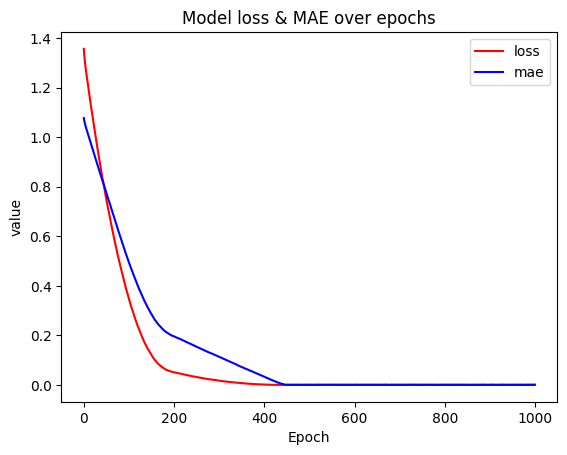

In [24]:
plt.plot(hist.history['loss'], 'r', label='loss')
plt.plot(hist.history['mae'], 'b', label='mae')
plt.legend() # 범례 label 추가
plt.xlabel('Epoch') # 학습횟수
plt.ylabel('value')
plt.title('Model loss & MAE over epochs')
plt.show()

In [25]:
# 7. 모델 저장 및 사용
# 학습 후 예측
model.predict(np.array([[0],
                       [0.01]])) # 섭씨온도 0, 1도는 화씨온도 몇도?

1/1 [==============================] - 0s 20ms/step


array([[0.3198275],
       [0.3378227]], dtype=float32)

In [26]:
model.save('model/after_learning.h5')

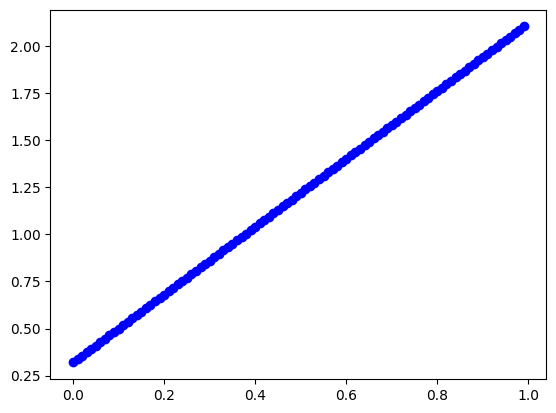

In [27]:
# 실제값
plt.scatter(x=scaled_data_C,
           y=scaled_data_F,
           c='b')
plt.show()

In [28]:
# 예측값
y_hat = model.predict([scaled_data_C])
for h, y, in zip(y_hat, scaled_data_F) : 
    print('예측값 : {}, 실제값 : {}, 오차 : {}'.format(h,
                                              y,
                                              h[0]-y))

4/4 [==============================] - 0s 2ms/step
예측값 : [0.3198275], 실제값 : 0.32, 오차 : -0.00017250299453736018
예측값 : [0.3378227], 실제값 : 0.33799999999999997, 오차 : -0.00017729449272152475
예측값 : [0.3558179], 실제값 : 0.35600000000000004, 오차 : -0.00018208599090580035
예측값 : [0.3738131], 실제값 : 0.374, 오차 : -0.00018690729141235263
예측값 : [0.3918083], 실제값 : 0.392, 오차 : -0.00019169878959657272
예측값 : [0.4098035], 실제값 : 0.41, 오차 : -0.0001964902877807373
예측값 : [0.42779872], 실제값 : 0.428, 오차 : -0.00020128178596495738
예측값 : [0.44579393], 실제값 : 0.446, 오차 : -0.00020607328414917747
예측값 : [0.4637891], 실제값 : 0.46399999999999997, 오차 : -0.00021089458465572974
예측값 : [0.48178434], 실제값 : 0.48200000000000004, 오차 : -0.00021565628051761765
예측값 : [0.49977952], 실제값 : 0.5, 오차 : -0.00022047758102416992
예측값 : [0.5177747], 실제값 : 0.518, 오차 : -0.0002252988815307777
예측값 : [0.53576994], 실제값 : 0.536, 오차 : -0.0002300605773926101
예측값 : [0.5537651], 실제값 : 0.554, 오차 : -0.00023488187789921788
예측값 : [0.5717603], 실제값 : 0.57200000000000

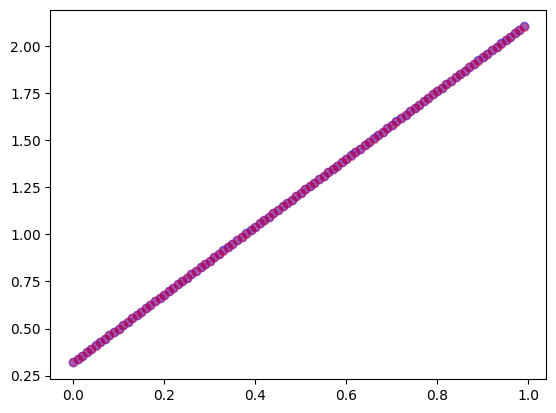

In [31]:
plt.scatter(x=scaled_data_C, y=scaled_data_F, c='b', alpha=0.5) # 투명한 점그래프
plt.scatter(x=scaled_data_C, y=y_hat, c='r', alpha=0.3)

## 2.2 노이즈가 있는 데이터로 실습

In [34]:
np.random.seed(7)
noise = np.random.normal(0, scale=0.1, size=100) # 평균 0, 표준편차 0,1인 100개 데이터
noised_scaled_data_F = scaled_data_F + noise

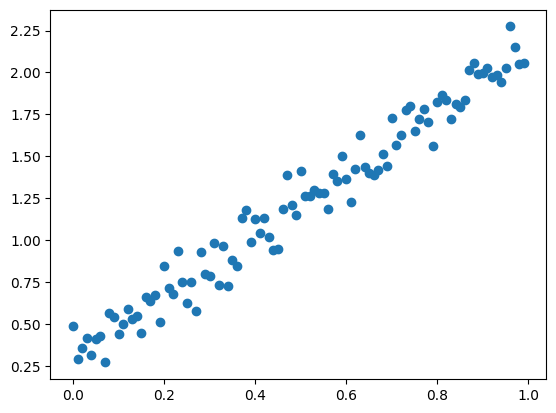

In [35]:
plt.scatter(x=scaled_data_C, y=noised_scaled_data_F)
plt.show()

In [36]:
# 3. 모델 구성
model2 = Sequential()
model2.add(Dense(1, input_shape=(1, )))
# 4. 학습과정 설정
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [38]:
# 5. 모델 학습
hist2 = model2.fit(scaled_data_C, noised_scaled_data_F, epochs=1000, verbose=1)

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.0637 - mae: 1.5799
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 3.0266 - mae: 1.5690
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.9980 - mae: 1.5607
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.9724 - mae: 1.5532
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.9501 - mae: 1.5466
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.9283 - mae: 1.5402
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.9075 - mae: 1.5339
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.8881 - mae: 1.5281
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.8677 - mae: 1.5219
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.8488 - mae: 1.5162
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - lo

4/4 [==============================] - 0s 2ms/step - loss: 1.5608 - mae: 1.0659
Epoch 89/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.5459 - mae: 1.0598
Epoch 90/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.5316 - mae: 1.0540
Epoch 91/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.5186 - mae: 1.0487
Epoch 92/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.5050 - mae: 1.0432
Epoch 93/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.4916 - mae: 1.0375
Epoch 94/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.4785 - mae: 1.0321
Epoch 95/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.4662 - mae: 1.0272
Epoch 96/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.4534 - mae: 1.0218
Epoch 97/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.4396 - mae: 1.0162
Epoch 98/1000
4/4 [==============================] - 0s 2ms/step - loss: 1

4/4 [==============================] - 0s 3ms/step - loss: 0.6410 - mae: 0.6496
Epoch 175/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.6331 - mae: 0.6457
Epoch 176/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6251 - mae: 0.6417
Epoch 177/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6171 - mae: 0.6375
Epoch 178/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6098 - mae: 0.6338
Epoch 179/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6014 - mae: 0.6296
Epoch 180/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5939 - mae: 0.6258
Epoch 181/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5877 - mae: 0.6226
Epoch 182/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5807 - mae: 0.6189
Epoch 183/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5741 - mae: 0.6155
Epoch 184/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.2406 - mae: 0.4208
Epoch 261/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2379 - mae: 0.4187
Epoch 262/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2366 - mae: 0.4177
Epoch 263/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2349 - mae: 0.4165
Epoch 264/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2327 - mae: 0.4146
Epoch 265/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2303 - mae: 0.4127
Epoch 266/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2280 - mae: 0.4106
Epoch 267/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2273 - mae: 0.4100
Epoch 268/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2257 - mae: 0.4086
Epoch 269/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2244 - mae: 0.4075
Epoch 270/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.1549 - mae: 0.3358
Epoch 347/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1542 - mae: 0.3349
Epoch 348/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1537 - mae: 0.3344
Epoch 349/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1530 - mae: 0.3337
Epoch 350/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1523 - mae: 0.3330
Epoch 351/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1516 - mae: 0.3320
Epoch 352/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1510 - mae: 0.3312
Epoch 353/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1502 - mae: 0.3305
Epoch 354/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1494 - mae: 0.3294
Epoch 355/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1488 - mae: 0.3286
Epoch 356/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0993 - mae: 0.2664
Epoch 433/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0989 - mae: 0.2658
Epoch 434/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0982 - mae: 0.2650
Epoch 435/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0976 - mae: 0.2641
Epoch 436/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0971 - mae: 0.2634
Epoch 437/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0966 - mae: 0.2627
Epoch 438/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0960 - mae: 0.2621
Epoch 439/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0956 - mae: 0.2614
Epoch 440/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0950 - mae: 0.2606
Epoch 441/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0945 - mae: 0.2599
Epoch 442/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0589 - mae: 0.2028
Epoch 519/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0585 - mae: 0.2022
Epoch 520/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0581 - mae: 0.2014
Epoch 521/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0577 - mae: 0.2008
Epoch 522/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0574 - mae: 0.2001
Epoch 523/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0568 - mae: 0.1991
Epoch 524/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0564 - mae: 0.1984
Epoch 525/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0560 - mae: 0.1977
Epoch 526/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0556 - mae: 0.1969
Epoch 527/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0551 - mae: 0.1962
Epoch 528/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0304 - mae: 0.1447
Epoch 605/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0300 - mae: 0.1440
Epoch 606/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0298 - mae: 0.1433
Epoch 607/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0295 - mae: 0.1428
Epoch 608/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0292 - mae: 0.1419
Epoch 609/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0290 - mae: 0.1415
Epoch 610/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0288 - mae: 0.1410
Epoch 611/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0286 - mae: 0.1403
Epoch 612/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0284 - mae: 0.1400
Epoch 613/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0281 - mae: 0.1395
Epoch 614/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0154 - mae: 0.1000
Epoch 691/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0153 - mae: 0.0996
Epoch 692/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0152 - mae: 0.0991
Epoch 693/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0150 - mae: 0.0988
Epoch 694/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0150 - mae: 0.0985
Epoch 695/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0149 - mae: 0.0981
Epoch 696/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0148 - mae: 0.0977
Epoch 697/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0147 - mae: 0.0975
Epoch 698/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0146 - mae: 0.0971
Epoch 699/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0145 - mae: 0.0968
Epoch 700/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0110 - mae: 0.0829
Epoch 777/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0110 - mae: 0.0827
Epoch 778/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0110 - mae: 0.0827
Epoch 779/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0110 - mae: 0.0827
Epoch 780/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0109 - mae: 0.0824
Epoch 781/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0109 - mae: 0.0825
Epoch 782/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0109 - mae: 0.0824
Epoch 783/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0109 - mae: 0.0821
Epoch 784/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0109 - mae: 0.0821
Epoch 785/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0108 - mae: 0.0820
Epoch 786/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 863/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0104 - mae: 0.0805
Epoch 864/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0104 - mae: 0.0809
Epoch 865/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0104 - mae: 0.0811
Epoch 866/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0104 - mae: 0.0809
Epoch 867/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0104 - mae: 0.0807
Epoch 868/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 869/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 870/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 871/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0103 - mae: 0.0802
Epoch 872/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 949/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 950/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 951/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0803
Epoch 952/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 953/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 954/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0803
Epoch 955/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0803
Epoch 956/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 957/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0803
Epoch 958/1000
4/4 [==============================] - 0s 2ms/step

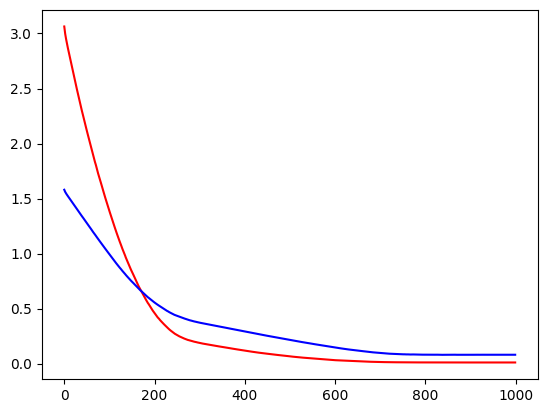

In [39]:
# 6. 학습된 모델 과정 살펴보기
plt.plot(hist2.history['loss'], c='r')
plt.plot(hist2.history['mae'], c='b')

In [41]:
model2.save('model/noise_after_learning.h5')

In [42]:
# 예측값
y_hat = model2.predict([scaled_data_C])

4/4 [==============================] - 0s 2ms/step


In [43]:
for h, y in zip(y_hat, noised_scaled_data_F) :
    print("실제값 : {}, 예측값 : {}, 오차 : {}". format(y,
                                               h,
                                               h[0]-y))

실제값 : 0.48905257038003563, 예측값 : [0.3053894], 오차 : -0.18366316608316063
실제값 : 0.2914062629459167, 예측값 : [0.3237405], 오차 : 0.03233424918672795
실제값 : 0.3592820163678585, 예측값 : [0.34209162], 오차 : -0.017190396399444197
실제값 : 0.4147516282996508, 예측값 : [0.36044273], 오차 : -0.05430890049546683
실제값 : 0.31310769713742614, 예측값 : [0.37879384], 오차 : 0.06568613850252747
실제값 : 0.4102065572905948, 예측값 : [0.39714494], 오차 : -0.013061613814871531
실제값 : 0.42791096141420687, 예측값 : [0.41549605], 오차 : -0.01241491010271395
실제값 : 0.2705275693654579, 예측값 : [0.43384713], 오차 : 0.16331955997948228
실제값 : 0.5657658005663493, 예측값 : [0.45219827], 오차 : -0.11356753358331706
실제값 : 0.542049851591955, 예측값 : [0.47054937], 오차 : -0.07150047677315308
실제값 : 0.43745710260332404, 예측값 : [0.48890048], 오차 : 0.05144338005124749
실제값 : 0.5008451738804279, 예측값 : [0.50725156], 오차 : 0.006406386807590869
실제값 : 0.5865299374196752, 예측값 : [0.5256027], 오차 : -0.060927239093564345
실제값 : 0.5278643584808353, 예측값 : [0.5439538], 오차 : 0.0160894178787

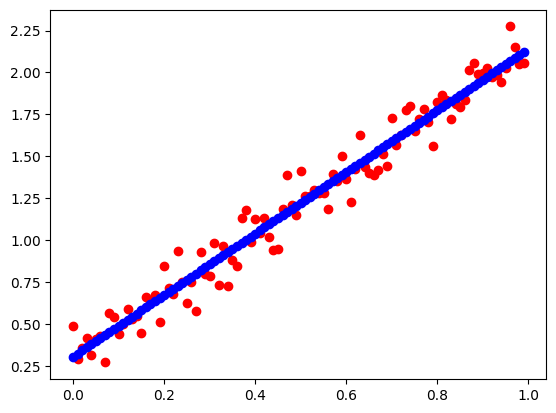

In [45]:
plt.scatter(x=scaled_data_C,
           y=noised_scaled_data_F,
           c='r')
plt.scatter(x=scaled_data_C,
           y=y_hat,
           c='b')